# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import ow_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"City count: {len(cities)}")

City count: 639


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
## OPEN WEATHER API

## Set OpenWeather API base url
ow_url = "http://api.openweathermap.org/data/2.5/weather?q="
## Set Units
units = "imperial"

## Create weather data empty list
weather_data = []
## Set initial values
record = 1

## Print Log Header
print("Beginning Data Retrieval")
print("------------------------------")

for city in cities:
        ##
        query_url = f"{ow_url}{city}&appid={ow_key}&units={units}"
        response = requests.get(query_url).json()
        try:
            ## Print Log Status
            print(f"Processing Record {record:>2d} | City Id = {response['id']:<7d} [{city}]")
            ## Retrieve weather data from OpenWeather API (response)
            weather_data.append({
                'City': response['name'],
                'Lat': response['coord']['lat'],
                'Lng': response['coord']['lon'],
                'Max Temp': response['main']['temp_max'],
                'Humidity': response['main']['humidity'],
                'Cloudiness': response['clouds']['all'],
                'Wind Speed': response['wind']['speed'],
                'Country': response['sys']['country'],
                'Date': response['dt']
            })
            ## Record counter
            record += 1
        except KeyError:
            ## Print Log Status
            print(f"City [{city}] not found. Skipping...")
            pass

## Print Log Footer
print("------------------------------")        
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
City [taolanaro] not found. Skipping...
Processing Record  1 | City Id = 293842  [gat]
Processing Record  2 | City Id = 3418910 [upernavik]
Processing Record  3 | City Id = 2075265 [busselton]
Processing Record  4 | City Id = 1282256 [hithadhoo]
Processing Record  5 | City Id = 6201424 [mataura]
Processing Record  6 | City Id = 4034551 [faanui]
Processing Record  7 | City Id = 3369157 [cape town]
Processing Record  8 | City Id = 1487860 [vagay]
Processing Record  9 | City Id = 2297505 [navrongo]
Processing Record 10 | City Id = 4031574 [provideniya]
Processing Record 11 | City Id = 3421765 [nanortalik]
Processing Record 12 | City Id = 3448903 [sao joao da barra]
Processing Record 13 | City Id = 4726521 [san patricio]
Processing Record 14 | City Id = 2121385 [severo-kurilsk]
Processing Record 15 | City Id = 4030556 [rikitea]
Processing Record 16 | City Id = 3466704 [castro]
Processing Record 17 | City Id = 3471451 [arraial do cabo]

Processing Record 145 | City Id = 7601762 [bairiki]
Processing Record 146 | City Id = 1507390 [dikson]
Processing Record 147 | City Id = 5367788 [lompoc]
Processing Record 148 | City Id = 2122090 [pevek]
Processing Record 149 | City Id = 2172797 [cairns]
City [papasquiaro] not found. Skipping...
Processing Record 150 | City Id = 1254709 [tezu]
Processing Record 151 | City Id = 554234  [kaliningrad]
Processing Record 152 | City Id = 3353540 [rehoboth]
Processing Record 153 | City Id = 2110227 [butaritari]
Processing Record 154 | City Id = 6255012 [flinders]
Processing Record 155 | City Id = 4011741 [durango]
Processing Record 156 | City Id = 777682  [skjervoy]
Processing Record 157 | City Id = 3355672 [luderitz]
Processing Record 158 | City Id = 1485904 [yermakovskoye]
Processing Record 159 | City Id = 3927995 [tambo]
Processing Record 160 | City Id = 6162949 [terrace]
Processing Record 161 | City Id = 3092472 [marienburg]
Processing Record 162 | City Id = 5924351 [clyde river]
Processi

Processing Record 293 | City Id = 3361934 [saldanha]
Processing Record 294 | City Id = 2208248 [kaitangata]
City [camflora] not found. Skipping...
Processing Record 295 | City Id = 4844309 [torrington]
Processing Record 296 | City Id = 3407762 [amapa]
Processing Record 297 | City Id = 2209055 [waddan]
City [juifang] not found. Skipping...
Processing Record 298 | City Id = 6621469 [arcachon]
Processing Record 299 | City Id = 2077895 [alice springs]
Processing Record 300 | City Id = 2126785 [belaya gora]
City [ruatoria] not found. Skipping...
Processing Record 301 | City Id = 1490256 [talnakh]
Processing Record 302 | City Id = 1513990 [gazli]
Processing Record 303 | City Id = 5572400 [susanville]
Processing Record 304 | City Id = 4013679 [coahuayana]
Processing Record 305 | City Id = 5505411 [henderson]
Processing Record 306 | City Id = 2171465 [clarence town]
City [nizhneyansk] not found. Skipping...
Processing Record 307 | City Id = 3838583 [rosario]
Processing Record 308 | City Id = 1

Processing Record 435 | City Id = 1523662 [kachiry]
Processing Record 436 | City Id = 5984000 [iroquois falls]
Processing Record 437 | City Id = 3902377 [trinidad]
Processing Record 438 | City Id = 610864  [khani]
Processing Record 439 | City Id = 58933   [garowe]
Processing Record 440 | City Id = 2152659 [port macquarie]
Processing Record 441 | City Id = 3346015 [sumbe]
Processing Record 442 | City Id = 1863997 [fukue]
Processing Record 443 | City Id = 2304548 [anloga]
Processing Record 444 | City Id = 3407407 [aquiraz]
Processing Record 445 | City Id = 527217  [mglin]
Processing Record 446 | City Id = 3121424 [gijon]
Processing Record 447 | City Id = 5038045 [monticello]
Processing Record 448 | City Id = 1106643 [quatre cocos]
Processing Record 449 | City Id = 2092164 [lorengau]
Processing Record 450 | City Id = 4231997 [avera]
Processing Record 451 | City Id = 1489656 [teya]
Processing Record 452 | City Id = 2677456 [skoghall]
Processing Record 453 | City Id = 5851349 [nanakuli]
Pro

Processing Record 583 | City Id = 5545269 [price]
Processing Record 584 | City Id = 5915327 [cap-aux-meules]
Processing Record 585 | City Id = 610298  [beyneu]
Processing Record 586 | City Id = 3136023 [storsteinnes]
Processing Record 587 | City Id = 2015707 [takhtamygda]
Processing Record 588 | City Id = 463355  [zheleznodorozhnyy]
Processing Record 589 | City Id = 2173125 [burnie]
Processing Record 590 | City Id = 556268  [ostrovnoy]
Processing Record 591 | City Id = 1133310 [mirabad]
Processing Record 592 | City Id = 1786760 [yicheng]
------------------------------
Data Retrieval Complete
------------------------------


In [4]:
# Print the city count to confirm updated count
print(f"Updated city count: {len(weather_data)}")

Updated city count: 592


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
## Build DataFrame
raw_city_data = pd.DataFrame(data = weather_data)

## Export DataFrame (of all retrieved data) to CSV
raw_city_data.to_csv('Output/Cities.csv', index=False, header=True, encoding='utf-8')

## Display DataFrame
raw_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kiryat Gat,31.6100,34.7642,84.00,60,0,3.44,IL,1619681870
1,Upernavik,72.7868,-56.1549,15.58,82,18,8.55,GL,1619681870
2,Busselton,-33.6500,115.3333,63.00,96,100,1.01,AU,1619681871
3,Hithadhoo,-0.6000,73.0833,83.39,73,90,9.57,MV,1619681871
4,Mataura,-46.1927,168.8643,55.00,94,100,7.00,NZ,1619681871


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
## Inspect data to check max humidity is equal or less than 100%
raw_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,5.920000e+02
mean,20.503095,17.809258,63.252872,68.788851,56.614865,7.661959,1.619682e+09
std,32.939464,89.819328,19.671455,23.594452,38.948580,5.000546,7.494685e+01
min,-54.800000,-179.166700,14.990000,4.000000,0.000000,0.110000,1.619681e+09
25%,-7.077450,-62.143950,48.960000,57.000000,20.000000,4.037500,1.619682e+09
50%,26.187400,22.125350,64.990000,73.000000,70.000000,6.700000,1.619682e+09
75%,47.250350,96.138050,78.840000,87.000000,97.000000,10.202500,1.619682e+09
max,78.218600,179.316700,110.520000,100.000000,100.000000,28.010000,1.619682e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
outlier_index = raw_city_data.loc[raw_city_data['Humidity']>100].index
print(f"Number of cities with humidity over 100%: {len(outlier_index)}")
print(f"Indices: {outlier_index}")

Number of cities with humidity over 100%: 0
Indices: Int64Index([], dtype='int64')


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = raw_city_data.drop(index=outlier_index, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kiryat Gat,31.6100,34.7642,84.00,60,0,3.44,IL,1619681870
1,Upernavik,72.7868,-56.1549,15.58,82,18,8.55,GL,1619681870
2,Busselton,-33.6500,115.3333,63.00,96,100,1.01,AU,1619681871
3,Hithadhoo,-0.6000,73.0833,83.39,73,90,9.57,MV,1619681871
4,Mataura,-46.1927,168.8643,55.00,94,100,7.00,NZ,1619681871


In [9]:
## Inspect data to check max humidity is equal or less than 100%
clean_city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,5.920000e+02
mean,20.503095,17.809258,63.252872,68.788851,56.614865,7.661959,1.619682e+09
std,32.939464,89.819328,19.671455,23.594452,38.948580,5.000546,7.494685e+01
min,-54.800000,-179.166700,14.990000,4.000000,0.000000,0.110000,1.619681e+09
25%,-7.077450,-62.143950,48.960000,57.000000,20.000000,4.037500,1.619682e+09
50%,26.187400,22.125350,64.990000,73.000000,70.000000,6.700000,1.619682e+09
75%,47.250350,96.138050,78.840000,87.000000,97.000000,10.202500,1.619682e+09
max,78.218600,179.316700,110.520000,100.000000,100.000000,28.010000,1.619682e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [10]:
## SET PARAMETERS

## Date of analysis: Get current time and covert date to string (mm/dd/yyyy)
date = time.strftime('%m-%d-%Y')

## Set initial values
figure_num = 1

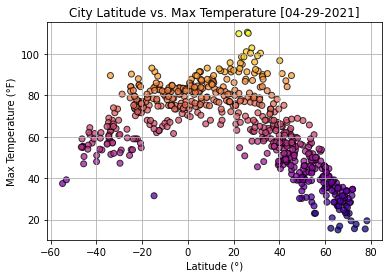

In [11]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='royalblue', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Max Temperature [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Max Temperature (°F)")

## Show grid
plt.grid()
# Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Latitude vs. Humidity Plot

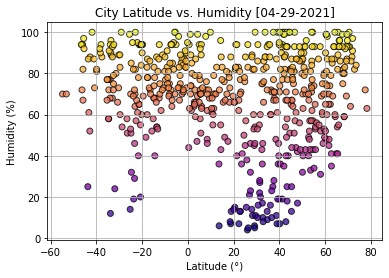

In [12]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='orange', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Humidity [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Humidity (%)")

## Show grid
plt.grid()
## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Latitude vs. Cloudiness Plot

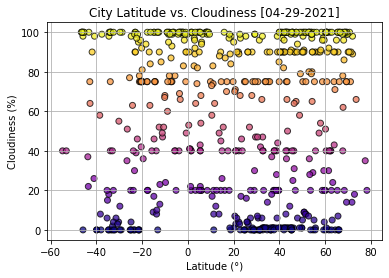

In [13]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='purple', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Cloudiness [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Cloudiness (%)")

## Show grid
plt.grid()
## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Latitude vs. Wind Speed Plot

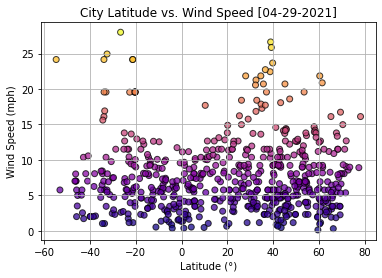

In [14]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']

## SCATTER PLOT
## Set Scatter Plot parameters
# plt.scatter(x_values, y_values, color='green', alpha=0.5, edgecolors= "black")
plt.scatter(x_values, y_values, c=y_values, cmap='plasma', alpha=0.75, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Wind Speed [{date}]")
plt.xlabel("Latitude (°)")
plt.ylabel("Wind Speed (mph)")

## Show grid
plt.grid()
## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1
## Show plot
plt.show()

## Linear Regression

In [15]:
## SEPARATE NORTHERN & SOUTHERN HEMISPHERES (get .loc booleans)
## Northern Hemisphere (greater than or equal to 0 degrees latitude)
north_hemisphere = clean_city_data["Lat"] >= 0
## Southern Hemisphere (less than 0 degrees latitude)
south_hemisphere = clean_city_data["Lat"] < 0

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear reggression coefficient of detemination R^2 is: 71.70%


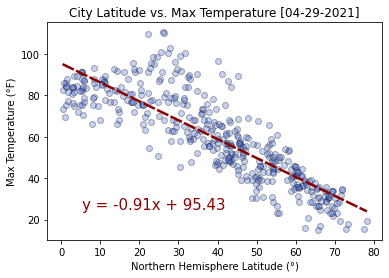

In [16]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat'].loc[north_hemisphere]
y_values = clean_city_data['Max Temp'].loc[north_hemisphere]

## LINEAR REGRESSION
## Compute Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
## Set regression line parameters (x0-x1)
regress_line_x = (min(x_values), max(x_values))
## Set regression line parameters (y0-y1)
regress_line_y = [min(x_values) * slope + intercept, max(x_values) * slope + intercept]
# Set regresion line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

## SCATTER PLOT
## Set Scatter Plot parameters
plt.scatter(x_values, y_values, color='royalblue', alpha=0.3, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Max Temperature [{date}]")
plt.xlabel("Northern Hemisphere Latitude (°)")
plt.ylabel("Max Temperature (°F)")

## REGRESSION LINE PLOT
## Set Line Plot parameters
plt.plot(regress_line_x, regress_line_y, linestyle=(0, (5, 1)), color='darkred', alpha=1, linewidth=2.5)
## Annotate regression line equation
plt.annotate(line_eq, (min(x_values)+5, min(y_values)+10), fontsize=15, color='darkred')

## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1

## Print r-value
print(f"The linear reggression coefficient of detemination R^2 is: {rvalue**2:.2%}")

## Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear reggression coefficient of detemination R^2 is: 42.30%


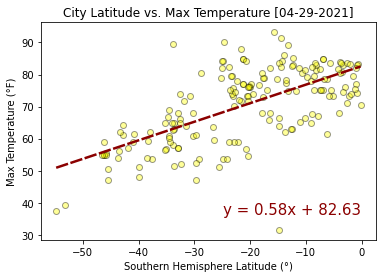

In [17]:
# Set x & y values for scatter plot
x_values = clean_city_data['Lat'].loc[south_hemisphere]
y_values = clean_city_data['Max Temp'].loc[south_hemisphere]

## LINEAR REGRESSION
## Compute Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
## Set regression line parameters (x0-x1)
regress_line_x = (min(x_values), max(x_values))
## Set regression line parameters (y0-y1)
regress_line_y = [min(x_values) * slope + intercept, max(x_values) * slope + intercept]
# Set regresion line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

## SCATTER PLOT
## Set Scatter Plot parameters
plt.scatter(x_values, y_values, color='yellow', alpha=0.4, edgecolors= "black")

# Set Title, X Label, and Y Label
plt.title(f"City Latitude vs. Max Temperature [{date}]")
plt.xlabel("Southern Hemisphere Latitude (°)")
plt.ylabel("Max Temperature (°F)")

## REGRESSION LINE PLOT
## Set Line Plot parameters
plt.plot(regress_line_x, regress_line_y, linestyle=(0, (5, 1)), color='darkred', alpha=1, linewidth=2.5)
## Annotate regression line equation
plt.annotate(line_eq, (min(x_values)+30, min(y_values)+5), fontsize=15, color='darkred')

## Save plot
plt.savefig(f"Output/Fig_{figure_num:02d}.png")
figure_num += 1

## Print r-value
print(f"The linear reggression coefficient of detemination R^2 is: {rvalue**2:.2%}")

## Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression